<a href="https://colab.research.google.com/github/rahul-727/Predictive-Analytics/blob/main/2348544_Lab9%2610_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 9

#Dataset 1

London Weather Data

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tpot import TPOTRegressor

In [60]:
data = pd.read_csv('/content/london_weather.csv')
data.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [61]:
data.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [62]:
data.shape

(15341, 10)

In [63]:
data.isnull().sum()

,0
date,0
cloud_cover,19
sunshine,0
global_radiation,19
max_temp,6
mean_temp,36
min_temp,2
precipitation,6
pressure,4
snow_depth,1441


In [64]:
# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

In [65]:
# Extract relevant columns
features = ['cloud_cover', 'sunshine', 'global_radiation',
            'max_temp', 'mean_temp', 'min_temp', 'precipitation',
            'pressure', 'snow_depth']
target = 'mean_temp'

In [66]:
# Drop rows with missing values
data = data.dropna(subset=features + [target])

In [67]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor

In [68]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

Mean Squared Error (MSE): 0.0013310357529794045
R-squared (R2 Score): 0.9999589583670365


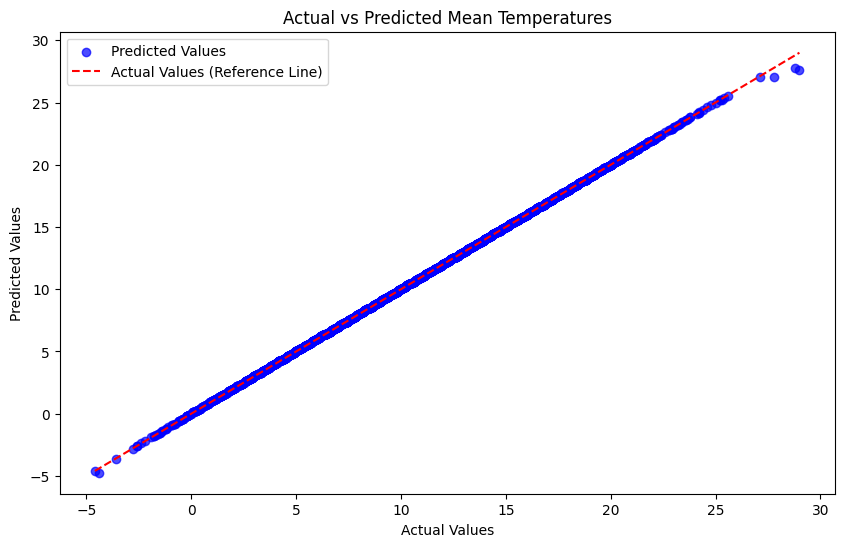

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted Values", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Mean Temperatures")
plt.legend()
plt.show()

By comp

With Genetic Algorithm

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -3.782754930454108e-09

Generation 2 - Current best internal CV score: -3.782754930454108e-09

Generation 3 - Current best internal CV score: -3.782754930454108e-09

Generation 4 - Current best internal CV score: -1.1336177008242017e-09

Generation 5 - Current best internal CV score: -1.1336177008242017e-09

Best pipeline: RidgeCV(ZeroCount(input_matrix))
Mean Squared Error (MSE) with GA: 4.059700262289263e-09
R-squared (R2 Score) with GA: 0.9999999998748218


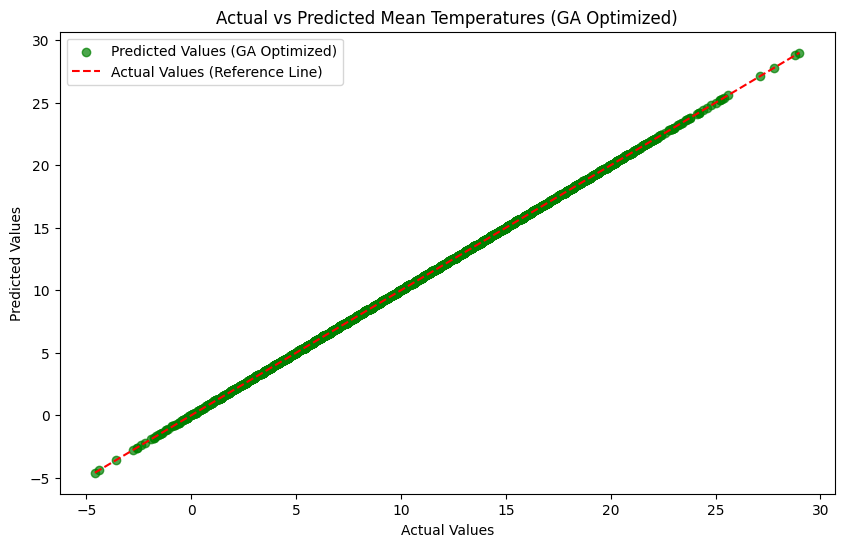

In [71]:
tpot = TPOTRegressor(
    generations=5,          # Number of generations to run the GA
    population_size=20,     # Population size
    verbosity=2,            # Verbosity level for logging
    random_state=42,        # Random state for reproducibility
    n_jobs=-1               # Utilize all processors
)
tpot.fit(X_train, y_train)
y_pred_ga = tpot.predict(X_test)

# Evaluate the GA-optimized model
mse_ga = mean_squared_error(y_test, y_pred_ga)
r2_ga = r2_score(y_test, y_pred_ga)

print(f"Mean Squared Error (MSE) with GA: {mse_ga}")
print(f"R-squared (R2 Score) with GA: {r2_ga}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ga, alpha=0.7, label="Predicted Values (GA Optimized)", color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Mean Temperatures (GA Optimized)")
plt.legend()
plt.show()

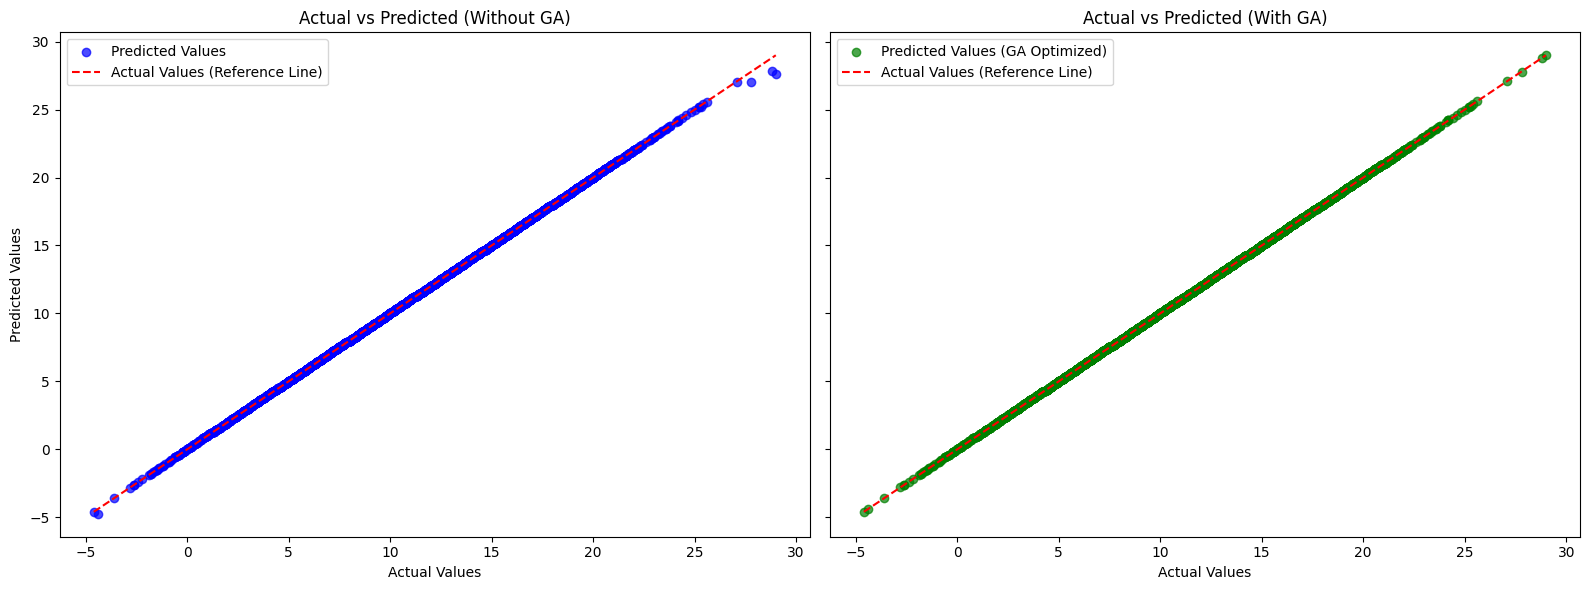

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
axs[0].scatter(y_test, y_pred, alpha=0.7, label="Predicted Values", color="blue")
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
axs[0].set_xlabel("Actual Values")
axs[0].set_ylabel("Predicted Values")
axs[0].set_title("Actual vs Predicted (Without GA)")
axs[0].legend()

axs[1].scatter(y_test, y_pred_ga, alpha=0.7, label="Predicted Values (GA Optimized)", color="green")
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
axs[1].set_xlabel("Actual Values")
axs[1].set_title("Actual vs Predicted (With GA)")
axs[1].legend()
plt.tight_layout()
plt.show()

By comparing the plot we can see that GA optimized plot is little better than without GA plot, the points are more close to the actual values in GA optimized plot

Compared to the plot without GA, the points in this plot appear to be more tightly clustered around the diagonal line, suggesting that the GA-optimized model is making more accurate predictions.

# Lab 10

# DataSet 2
Australia Weather Data

In [90]:
australia_weather = pd.read_csv('/content/Weather Test Data.csv')
australia_weather.head(5)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


In [91]:
australia_weather.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [92]:
# Convert categorical columns to numeric using one-hot encoding
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
australia_weather = pd.get_dummies(australia_weather, columns=categorical_columns, drop_first=True)

In [93]:
# Define features and target variable
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
            'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
            'Temp9am', 'Temp3pm']
X = australia_weather[features]
y = australia_weather['MaxTemp']

In [94]:
X = X.dropna()
y = y[X.index]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
baseline_model = RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [97]:
y_pred_baseline = baseline_model.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)
print(f"Baseline Model - MSE: {mse_baseline}")
print(f"Baseline Model - R²: {r2_baseline}")

Baseline Model - MSE: 0.00034921187662150687
Baseline Model - R²: 0.9999929346825517


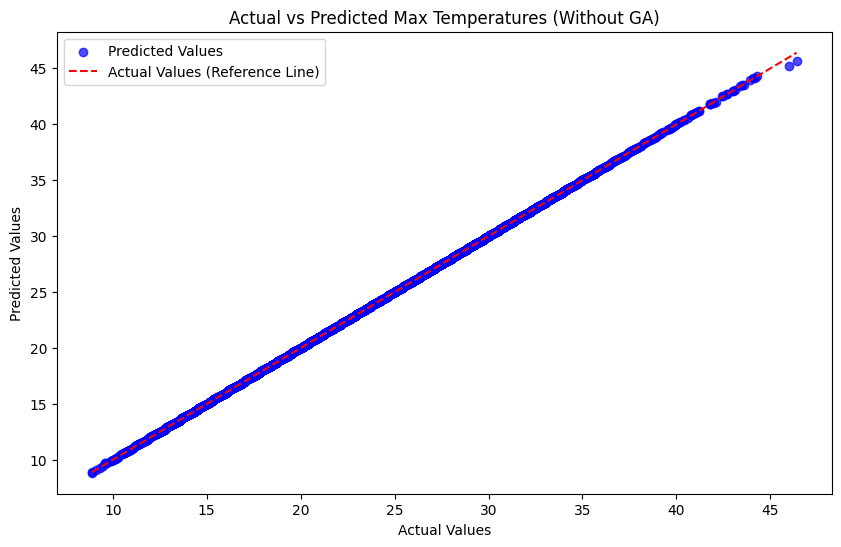

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_baseline, alpha=0.7, label="Predicted Values", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Max Temperatures (Without GA)")
plt.legend()
plt.show()

# With GA

In [99]:
tpot = TPOTRegressor(
    generations=5,
    population_size=20,
    verbosity=2,
    random_state=42,
    n_jobs=-1
)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -8.055173822318957e-11

Generation 2 - Current best internal CV score: -8.055173822318957e-11

Generation 3 - Current best internal CV score: -8.055173822318957e-11

Generation 4 - Current best internal CV score: -8.055173822318957e-11

Generation 5 - Current best internal CV score: -8.055173822318957e-11

Best pipeline: RidgeCV(input_matrix)


TPOTRegressor(generations=5, n_jobs=-1, population_size=20, random_state=42,
              verbosity=2)

In [100]:
y_pred_ga = tpot.predict(X_test)
mse_ga = mean_squared_error(y_test, y_pred_ga)
r2_ga = r2_score(y_test, y_pred_ga)
print(f"GA-Optimized Model - MSE: {mse_ga}")
print(f"GA-Optimized Model - R²: {r2_ga}")

GA-Optimized Model - MSE: 6.07219616623377e-11
GA-Optimized Model - R²: 0.9999999999987714


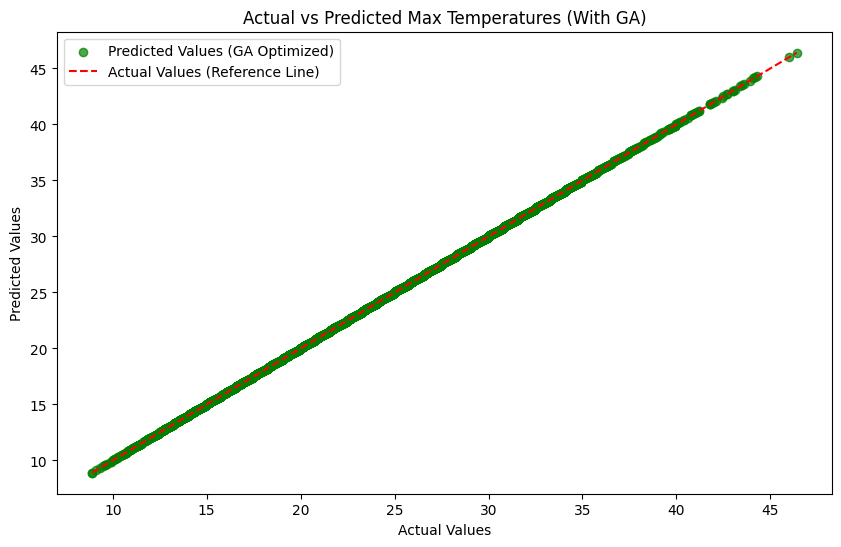

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ga, alpha=0.7, label="Predicted Values (GA Optimized)", color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Max Temperatures (With GA)")
plt.legend()
plt.show()

insights from actual vs predicted without GA
* There's a clear positive correlation between the actual and predicted values, indicating that the model is capturing the overall relationship between the features and the target variable.
*  The points are scattered around the diagonal line (reference line), indicating some errors in the predictions. The closer the points are to the diagonal, the better the model's accuracy.

insights from actual vs predicted with GA
* Compared to the previous plot, the points in this plot appear to be more tightly clustered around the diagonal line, suggesting that the GA-optimized model is making more accurate predictions.

* By comparing the two plots, we can see that the GA-optimized model generally exhibits a better fit to the data, with points clustered more closely around the diagonal line and potentially fewer outliers.